<a href="https://colab.research.google.com/github/madani2015/DDoS-Avoidance-Sterategy-for-Service-Availability/blob/main/imgprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory 4 (part I)


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
kernel_size = 3
ddepth = cv2.CV_16S
#range in python 3.x and xrange in python 2.x
xrange = range

In [31]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

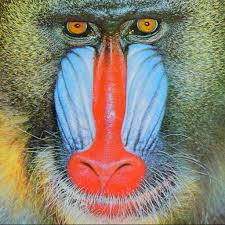

In [30]:
#Load the image 'Baboon.jpg'
img = cv2.imread('Baboon.jpg')
cv2_imshow(img)


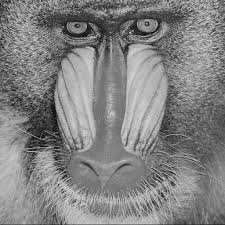

In [32]:
#Grayscale image
grayscale_img = cv2.imread('Baboon.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(grayscale_img)

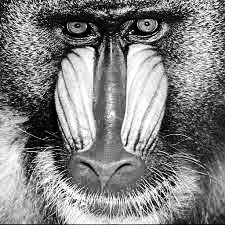

In [33]:
#Applying histogram equalization to grayscale image
equalization = cv2.equalizeHist(grayscale_img)
cv2_imshow(equalization)


In [34]:
#Get the rows, columns of histogram equalization image
#The matrix 'equalization' represents the image,
#and its rows correspond to the original image.
image_rows = equalization
#The transposed matrix of 'equalization' represents the columns of the image.
image_columns = equalization.T


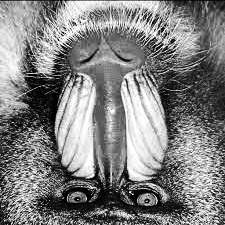

In [ ]:
#Remapping image upside down
#Inverting the image vertically
#Using 0 to indicate a vertical flip
upside_down = cv2.flip(equalization, 0)
cv2_imshow(upside_down)


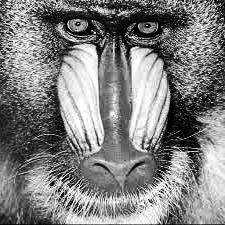

In [46]:
#Creating a reflection in the horizontal direction
#Using 1 to indicate a horizontal flip
reflected_image = cv2.flip(equalization, 1)
cv2_imshow(reflected_image)


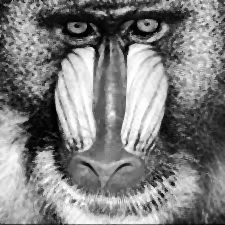

In [45]:
#Applying a Median filter with a specified window size (ksize=3)
median_filtered_image = cv2.medianBlur(equalization, ksize=3)
cv2_imshow(median_filtered_image)


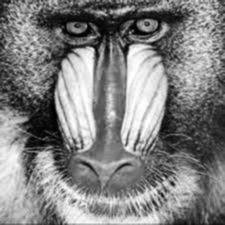

In [44]:
#Gaussian filter
gaussian_filtered_image = cv2.GaussianBlur(equalization, ksize=(3,3), sigmaX=0, sigmaY=0)
#Setting the standard deviation along both X and Y axes to 0
#computes it automatically from the kernel size

cv2_imshow(gaussian_filtered_image)


I evaluate the impact of both filters, ultimately I chose the Gaussian filter because of its balanced performance in noise reduction and edge preservation.

Moreover, the Gaussian filter functions akin to a mean filter by computing a weighted average of each pixel's surroundings. The weighting places greater emphasis on the central pixel's value. This characteristic results in a smoother effect that better preserves edges compared to a similarly sized mean filter.

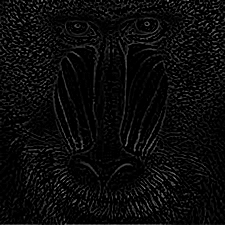

In [47]:
#Choose the best filter
chosen_filter_image = gaussian_filtered_image
#Applying the Laplacian function to generate the edge image using the Laplace Operator
laplacian_image = cv2.Laplacian(chosen_filter_image, cv2.CV_16S)
cv2_imshow(laplacian_image)

In [43]:
#Apply Sobel Edge Detection


In [48]:
#Calculate the x-gradient for Sobel Edge Detection
gradient_x = cv2.Sobel(chosen_filter_image, cv2.CV_16S, 1, 0)


In [49]:
#Calculate the y-gradient for Sobel Edge Detection
gradient_y = cv2.Sobel(chosen_filter_image, cv2.CV_16S, 0, 1)


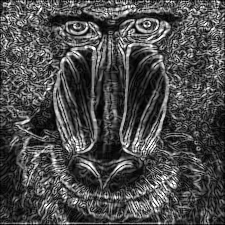

In [50]:
#Combined gradient for Sobel Edge Detection
abs_gradient_x  = cv2.convertScaleAbs(gradient_x)
abs_gradient_y = cv2.convertScaleAbs(gradient_y)

grad = cv2.addWeighted(abs_gradient_x, 0.5, abs_gradient_y, 0.5, 0)

cv2_imshow(grad)

Finally, I chose the Sobel edge detection method, finding it to exhibit greater precision in detecting image edges compared to the Laplacian approach. This preference is expected, considering that the second derivative in the Laplacian method amplifies noise to a greater extent than the first derivative in the Sobel method.





